# A Data-Driven Definition of the Growing Season

**Goal:** To create a dynamic, grid-cell-specific definition of the growing season based on a temperature threshold, as a superior alternative to a simple hemisphere rule.

**Methodology:**
1.  Load the full 36-year monthly temperature dataset.
2.  Define the growing season for each grid cell as any month where the average temperature is above 10°C.
3.  Calculate the length of the growing season (in months) for each grid cell and map it to verify the results.

--- Loading full monthly climate data (1981-2016) ---


C:\ProgramData\miniconda3\envs\climarisc\lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
C:\ProgramData\miniconda3\envs\climarisc\lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on th

Climate data loaded successfully.

--- Plotting the average length of the growing season (in months) ---


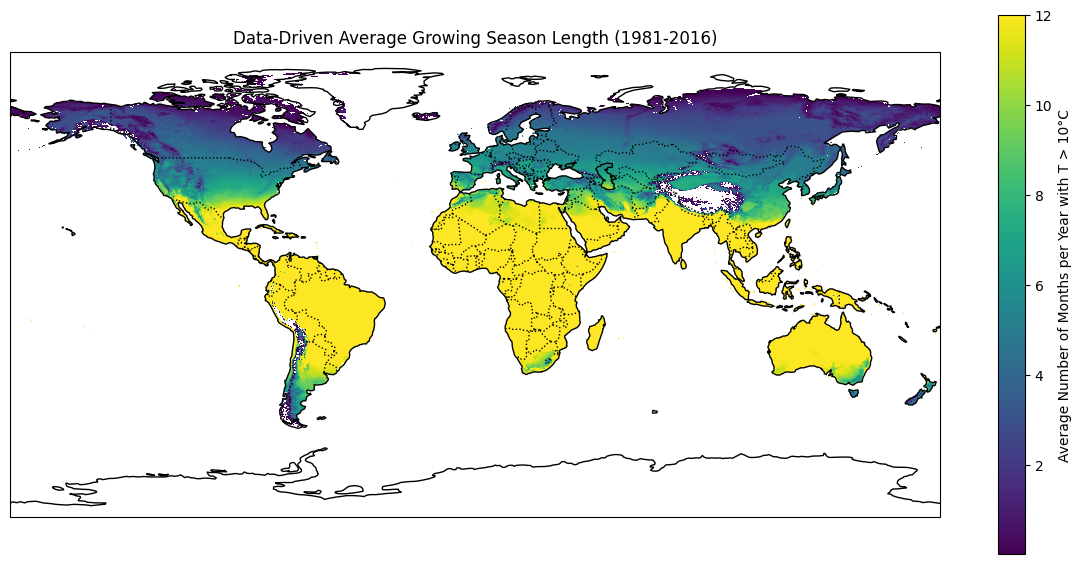

In [1]:
# Cell 1: Calculate and Map Growing Season Length
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# --- 1. Load the full 36-year monthly climate dataset ---
print("--- Loading full monthly climate data (1981-2016) ---")
CLIMATE_PATH = '../data/climate_monthly_full/era5_land_monthly_*.grib'
ds_climate_full = xr.open_mfdataset(
    CLIMATE_PATH, 
    engine='cfgrib',
    combine='nested',
    concat_dim='time',
    backend_kwargs={'filter_by_keys': {'shortName': '2t'}}
)
ds_climate_full = ds_climate_full.assign_coords(time=pd.to_datetime(ds_climate_full.time.values))
temp_celsius = ds_climate_full['t2m'] - 273.15
print("Climate data loaded successfully.")

# --- 2. Define the Growing Season using a Temperature Threshold ---
# We define the growing season as any month where the mean temperature is > 10°C.
# This creates a boolean (True/False) mask for every grid cell for every month.
growing_season_mask = temp_celsius > 10

# --- 3. Calculate the Length of the Growing Season ---
# We group by 'year' and sum the boolean mask. True counts as 1, False as 0.
# This gives us the number of months per year that are part of the growing season.
months_in_season_per_year = growing_season_mask.groupby('time.year').sum(dim='time')

# Now, calculate the average length of the growing season over the whole period for mapping.
avg_season_length = months_in_season_per_year.mean(dim='year')

# --- 4. Visualize the Result ---
print("\n--- Plotting the average length of the growing season (in months) ---")
plt.figure(figsize=(15, 7))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

avg_season_length.where(avg_season_length > 0).plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='viridis',
    cbar_kwargs={'label': 'Average Number of Months per Year with T > 10°C'}
)

plt.title('Data-Driven Average Growing Season Length (1981-2016)')
plt.show()